### 1. Приведите по 2 примера, когда лучше максимизировать Precision, а когда Recall.

#### Precision

В целом, если отнесение объекта класса "0" к классу "1" несёт в себе негативные последствия. 

1. Если требуется отделить неликвидные бумаги (не приносят дохода) от ликвидных (приносят доход). К классу "1" относим неликвидные бумаги. Увеличивая precision мы снижаем долю ликвидных бумаг (FP) которые были отфильтрованы. Это снизит потери в виде упущенной прибыли. При этом инфильтрация неликвидных бумаг (FN) убытков не приносит.

2. Если требуется группу людей разделить на группу активных А и неактивных Б. К классу "1" относим людей группы Б. Увеличивая precision снижаем количество людей группы А (FP), попавших в подгруппу Б. Таким образом максимизируя А в общей группе максимизируем активность общей группы. Если при этом в общей группе останется произвольное количестов В (FN) то на активность группы это не повлияет. 

#### Recall

Наоборот, если отнесение объекта класса "0" к классу "1" не несёт в себе негативных последствий.

1. Если требуется сделать профилактику заболевания по определённым симптомам. К классу "1" мы относим тех кому требуется профилактика. Увеличивая recall мы увеличиваем долю тех кому требуется профилактика (TP). При этом доля тех кто ошибочно был приписан к классу "1" (FP) не существенна, так как даже если часть здоровых людей попадут на профилактику то это им не повредит.

2. Если требуется очистить состав от примесей, при этом потери целевого состава не существенны. К классу "1" относим примеси. Увеличивая recall выделяем как можно больше примесей (TP). Если при этом какая-то часть состава будет удалена вместе с примесями (FP) то на чистоту полученного состава это не повлияет. А то что было отброшено в процессе обработки можно прогнать через очистку повторно.

### 2. Почему мы используем F-меру, почему, например, нельзя просто взять среднее от Precision и Recall?

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.DataFrame([[0,1], [0,1], [0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[1,1]], columns=['target', 'predict'])

Если есть набор данных в котором только один объект имеет класс "1", а алгоритм отнёс все объекты к классу "1": 

In [3]:
df.style.hide_index()

target,predict
0,1
0,1
0,1
0,1
0,1
0,1
0,1
0,1
0,1
1,1


Считаем среднее:

TP = 1
FP = 9
FN = 0

precision = TP / (TP + FP) = 1 / (1+9) = 0.1
recall = TP / (TP + FN) = 1 / (1+0) = 1
avg = (precision + recall) / 2 = 1.1 / 2 = 0.55

В данном Если считать среднее то правильный ответ выдаётся вероятностью приблизительно 0.5 в половине случаев. На самом деле вероятность 0.1 так как из 10 объектов правильно указан 1. Если же обектов будет 100 то вероятность останется около 0.5, а реально она 0.01.

Считаем F-меру:

In [4]:
precision = 0.1
recall = 1
beta = 0.5

f_score = (1+beta*beta)*(precision*recall)/(precision*beta*beta + recall)
f_score

0.12195121951219513

Вероятность 0.12 ближе к истине. 
К тому же при вычислении F-меры можно регулировать коэффициент бета 
тем самым взаимосвязано регулировать precision и recall (в зависимости от задачи).

#### 1. Выведите признаки с пропусками в train и test. Совпадают ли объекты с пропусками? Что может значить такое совпадение?

In [5]:
train_df = pd.read_csv('H:\\GeekBrains\Основное обучение\\II четверть\\Библиотеки Python для Data Science продолжение\\Урок 1. Введение в задачу классификации. Постановка задачи и подготовка данных\\course_project\\course_project_train.csv')
test_df = pd.read_csv('H:\\GeekBrains\Основное обучение\\II четверть\\Библиотеки Python для Data Science продолжение\\Урок 1. Введение в задачу классификации. Постановка задачи и подготовка данных\\course_project\\course_project_test.csv')

In [6]:
train_df.info()
len(train_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

7500

test_df.info()
len(test_df)

In [7]:
test_df.info() 
len(test_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

2500

В train и test имеются столбцы с пропускмми 'Annual Income', 'Years in current job', 'Number of Credit Problems', 'Bankruptcies', 'Credit Score'. Все остальные столбцы в обоих датасетах пропусков не имеют.

#### 2. Признак Annual Income (годовой доход) коррелирует с какими признаками? Можно ли использовать эту взаимосвязь для расчета пропусков?

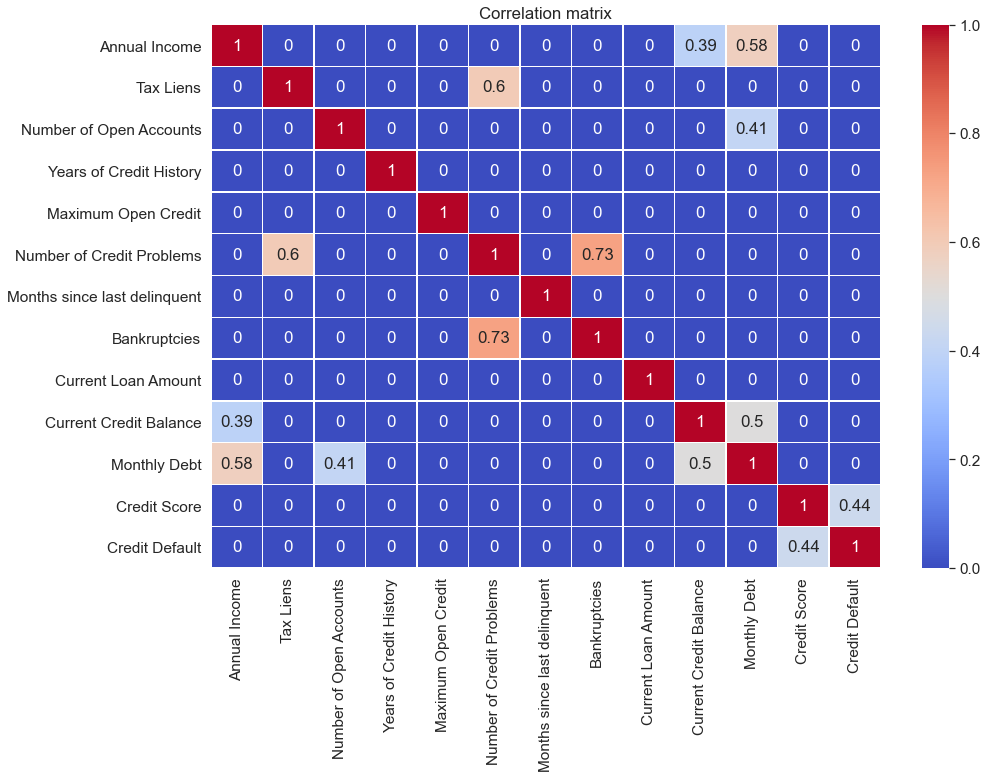

In [8]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

##### Ответ.
Судя по таблице для train_df:
 - Annual Income коррелирует с Current Credit Balance, Monthly Debt;
 - Tax Liens коррелирует с Number of Credit Problems;
 - Number of Open Accounts коррелирует с Monthly Debt;
 - Number of Credit Problems коррелирует с Bankruptcies;
 - Current Credit Balance коррелирует с Monthly Debt;
 - Credit Score коррелирует с Credit Score.
 
В прошлом курсе матрица корреляции конечно нам показывалась, но как её использовать - нет. 
Я уже выссказывался насчёт предыдущего курса - это дно. Так что на вопрос можно ли использовать эту взаимосвяь ответить не могу. Было бы неплохо если бы вы уделили этому вопросу хотя бы 10 мин. на однои из ваших вебинаров.

#### 3. Постройте распределение признака Credit Score (кредитный рейтинг). Проверьте, как меняется целевая переменная при разных значениях кредитного рейтинга. Чем можно заменить пропуски в этом признаке?

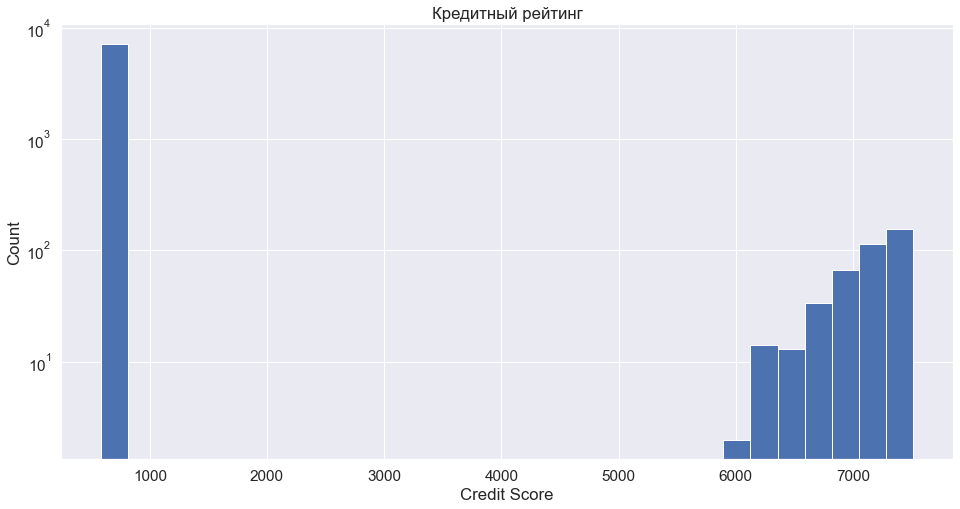

In [9]:
train_df.loc[train_df['Credit Score'].isna(), 'Credit Score'] = train_df['Credit Score'].median()
plt.figure(figsize = (16, 8))

train_df['Credit Score'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Credit Score')
plt.yscale('log')

plt.title('Кредитный рейтинг')
plt.show()

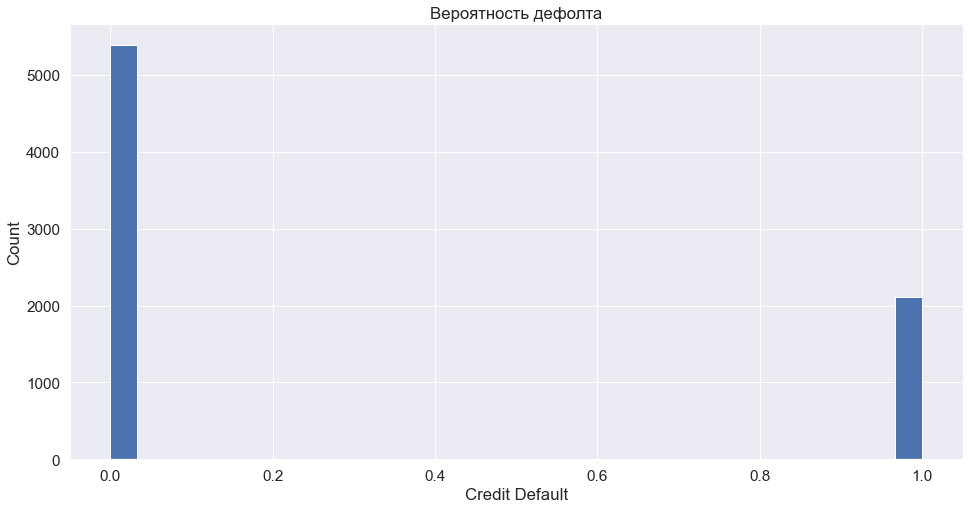

In [10]:
plt.figure(figsize = (16, 8))

train_df['Credit Default'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Credit Default')
#lt.yscale('log')
plt.title('Вероятность дефолта')
plt.show()

Ответ: пропуски можно заменить медианой, так как она менее подвержена выбросам чем среднее арифметическое. (Довольно странно, при макимальном кредитном рейтинге резко растёт количество дефолтов.)

#### 4. Пропуски в признаке Years in current job (количество лет на текущем месте работы) означают отсутствие данных или то, что клиент банка еще или уже не работает? Какие есть подходящие варианты замены пропусков?

Ответ: может означать и отсуствие данных и уже не работет. Заменить можно mode если она не больше возраста минус недееспособный возраст (18 лет видимо).